In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [2]:
full_train=pd.read_csv("train.csv")
full_test=pd.read_csv("test.csv")
sample=pd.read_csv("sample.csv")

In [3]:
train=full_train.copy()
test=full_test.copy()
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

# data analysis


In [7]:
cat_var=[]
cont_var=[]
for i in train.columns:
    if train[i].dtypes=="object":
        cat_var.append(i)
    else:
        cont_var.append(i)

for i in cat_var:
    plt.figure(figsize=(10,3))
    sns.countplot(train[i])
    plt.show()

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


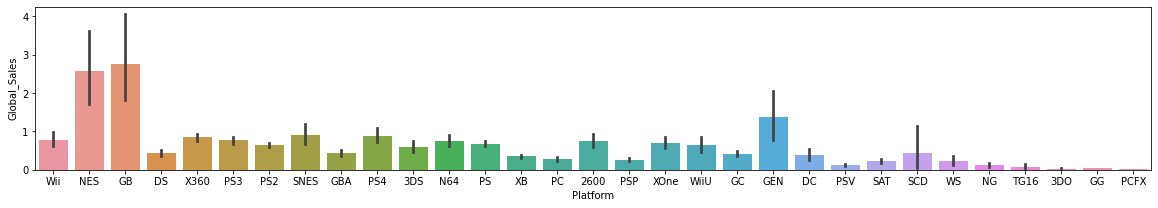

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


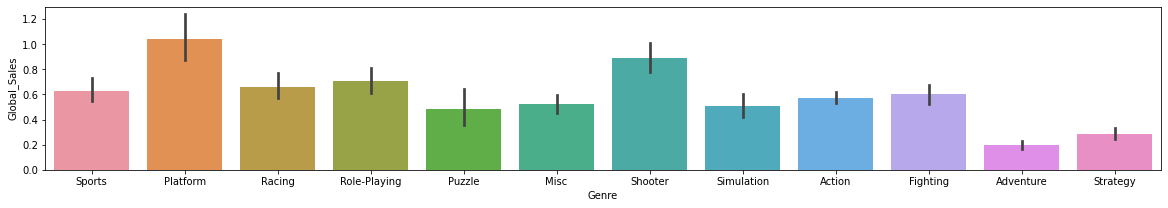

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


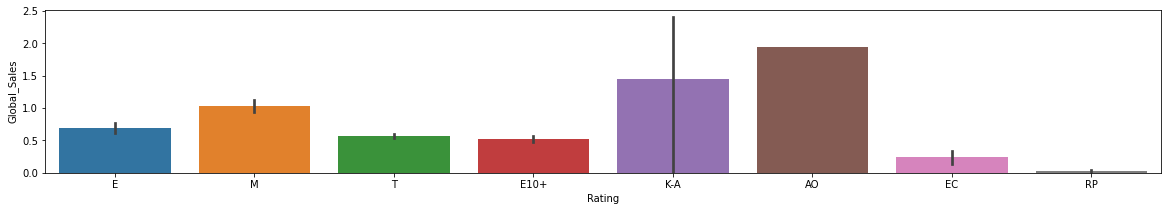

In [8]:
#seeing how does the cat variable vary with sales
variables=['Platform','Genre','Rating']
for i in variables:
    plt.figure(figsize=(20,3))
    sns.barplot(train[i],train['Global_Sales'])
    plt.show()
    
    

C:\Users\91738\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


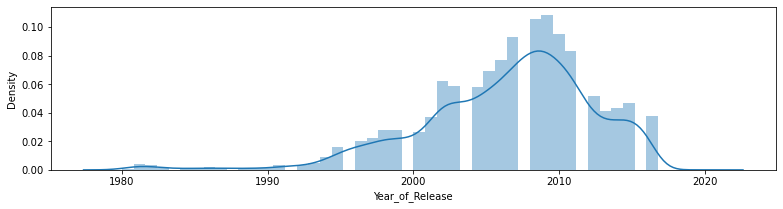

C:\Users\91738\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


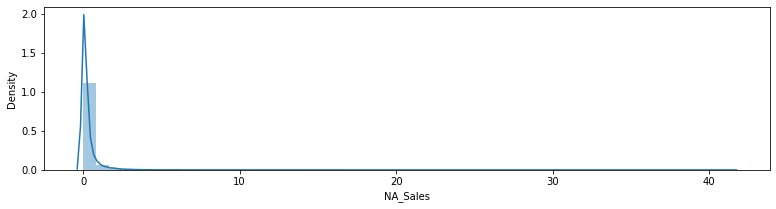

C:\Users\91738\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


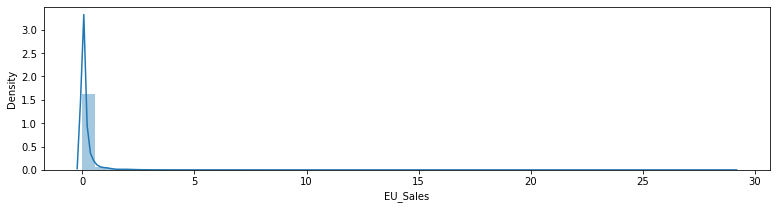

C:\Users\91738\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


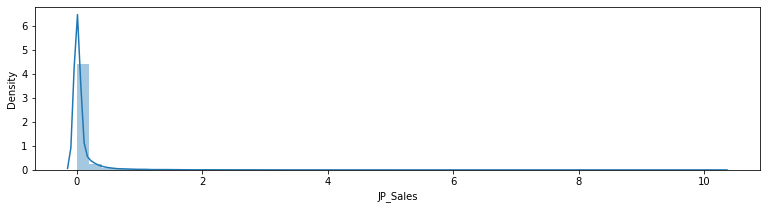

C:\Users\91738\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


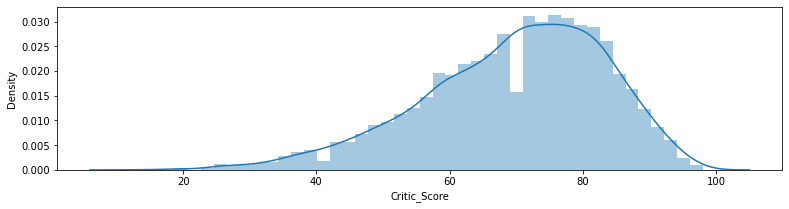

C:\Users\91738\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


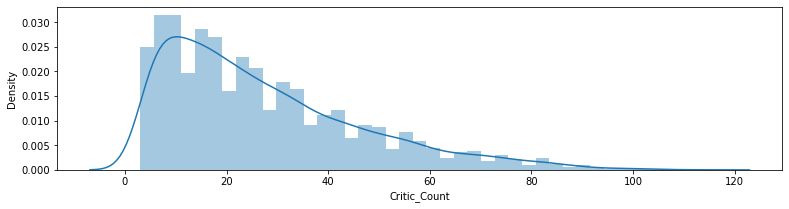

C:\Users\91738\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


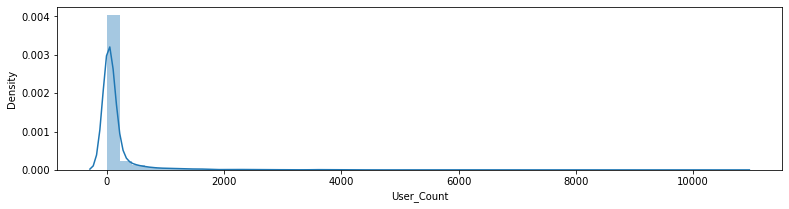

C:\Users\91738\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


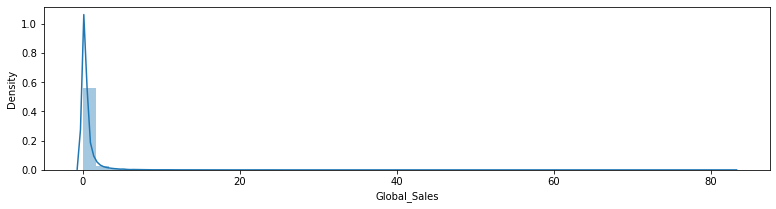

In [9]:
for i in cont_var:
    plt.figure(figsize=(13,3))
    sns.distplot(train[i])
    plt.show()
    

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


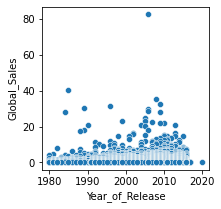

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


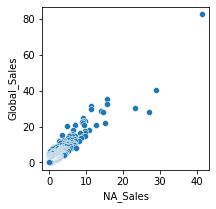

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


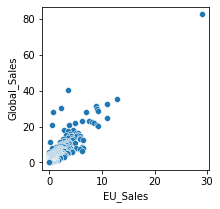

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


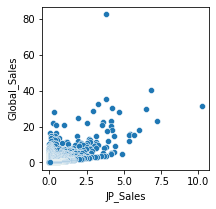

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


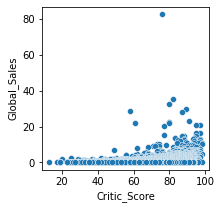

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


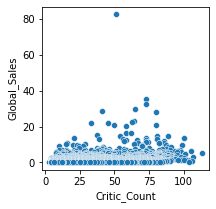

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


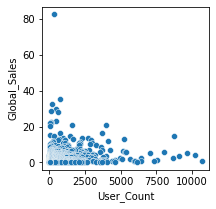

C:\Users\91738\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


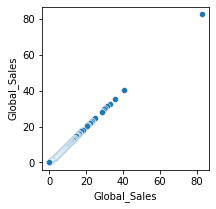

In [10]:
for i in cont_var:
    plt.figure(figsize=(3,3))
    sns.scatterplot(train[i],train['Global_Sales'])
    plt.show()
    

OBSERVATIONS:

Categorical Varibale:despite of the frequenct of occurance of each category in a variable it does not show show impact on the global sales (it is mostly vice versa )
lower the occurance greater is the global sales

Continuous Variables:all the variable folloe the normal distribution byt are left skewed,there is a linear relationship between the feature and the output variables


# data pre processing

In [5]:
cat_var=[]
cont_var=[]
for i in train.columns:
    if train[i].dtypes=="object":
        cat_var.append(i)
    else:
        cont_var.append(i)

In [8]:
cont_var

['Year_of_Release',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Critic_Score',
 'Critic_Count',
 'User_Count',
 'Global_Sales']

In [7]:
#imputing the continuous variable
imputer=KNNImputer()
train[cont_var]=pd.DataFrame(imputer.fit_transform(train[cont_var]),columns=cont_var)
test[cont_var]=pd.DataFrame(imputer.fit_transform(test[cont_var]),columns=cont_var)

KeyError: "['Global_Sales'] not in index"

In [14]:
#imputing the categorical variables
cat_var_to_impute_X=[]
cat_var_to_impute_X_test=[]

for i in X.columns:
        if X[i].isna().sum()>0:
            cat_var_to_impute_X.append(i)
            
for i in X_test.columns:
        if X_test[i].isna().sum()>0:
            cat_var_to_impute_X_test.append(i)

In [15]:
#step1:identify the columns to encode

col_to_impute=[]
for i in X.columns:
    if X[i].isna().sum()>0:
        col_to_impute.append(i)

In [16]:
col_to_impute

['Genre', 'Publisher', 'User_Score', 'Developer', 'Rating']

In [17]:
X['Genre'].fillna(X['Genre'].mode()[0],inplace=True)
X['Publisher'].fillna(X['Publisher'].mode()[0],inplace=True)
X['User_Score'].fillna(X['User_Score'].mode()[0],inplace=True)
X['Developer'].fillna(X['Developer'].mode()[0],inplace=True)
X['Rating'].fillna(X['Rating'].mode()[0],inplace=True)


In [18]:
#checking for the correlation among feature variables
X.corr()    

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count
Year_of_Release,1.000000,-0.098075,0.005787,-0.175602,-0.103582,0.078776,0.122789
NA_Sales,-0.098075,1.000000,0.763139,0.446972,0.267831,0.280711,0.241887
EU_Sales,0.005787,0.763139,1.000000,0.432235,0.252111,0.297796,0.313866
JP_Sales,-0.175602,0.446972,0.432235,1.000000,0.205652,0.181558,0.078824
Critic_Score,-0.103582,0.267831,0.252111,0.205652,1.000000,0.456205,0.272052
Critic_Count,0.078776,0.280711,0.297796,0.181558,0.456205,1.000000,0.387726
User_Count,0.122789,0.241887,0.313866,0.078824,0.272052,0.387726,1.000000


imputer.fit_transform(train[col_to_impute])

In [19]:
X

,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E
1,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,86.8,55.6,tbd,453.6,Ubisoft,E
2,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E
4,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,93.2,52.2,tbd,415.4,Ubisoft,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,70.4,16.2,tbd,22.2,Ubisoft,E
14572,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,72.6,23.6,tbd,107.8,Ubisoft,E
14573,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,70.4,16.2,tbd,22.2,Ubisoft,E
14574,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,38.2,13.0,tbd,14.2,Ubisoft,E


grid_model=GridSearchCV(model2_RF,param_grid=params,cv=10,verbose=5)

grid_model.fit(x_train,y_train)

grid_model.best_params_

RF=RandomForestRegressor()

model3_RF=RF.fit(x_train,y_train)

prediction=model3_RF.predict(x_validation)

print("model r2 score is:",model3_RF.score(x_validation,y_validation))

print("RMSE is:",sqrt(mean_squared_error(y_validation, prediction)))

adj_rsquare=1 - (1-model3_RF.score(x_validation, y_validation))*(len(y_validation)-1)/(len(y_validation)-x_validation.shape[1]-1)

print("Adjusted r-square value:",adj_rsquare)

In [7]:
full_train

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14572,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14573,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,0.01
14574,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.01


In [44]:
#clustering approach:
new_train=train.copy()

print(new_train.isna().sum())

cont_var=['Year_of_Release','NA_Sales','EU_Sales','JP_Sales','Critic_Score','Critic_Count','User_Count']
imputer=KNNImputer()
new_train[cont_var]=pd.DataFrame(imputer.fit_transform(new_train[cont_var]),columns=cont_var)

new_train['Genre'].fillna(new_train['Genre'].mode()[0],inplace=True)
new_train['Publisher'].fillna(new_train['Publisher'].mode()[0],inplace=True)
new_train['User_Score'].fillna(new_train['User_Score'].mode()[0],inplace=True)
new_train['Developer'].fillna(new_train['Developer'].mode()[0],inplace=True)
new_train['Rating'].fillna(new_train['Rating'].mode()[0],inplace=True)



print(new_train.isna().sum())

Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
Global_Sales       0
dtype: int64


wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,random_state=123).fit(new_train)
    wcss.append(kmeans.inertia_)

wcss

sns.lineplot(x=range(1,20,1),y=wcss)
plt.xlabel("no of clusters")
plt.ylabel("wcss")

kn = KneeLocator(range(1, 20), wcss, curve='convex', direction='decreasing')
kn.knee

In [45]:
new_train=pd.get_dummies(new_train)
new_train

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Platform_2600,Platform_3DO,...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1985.0,29.08,3.58,6.81,86.8,55.6,453.6,40.24,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1996.0,11.27,8.89,10.22,93.2,52.2,415.4,31.37,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0.01,0,0,...,0,0,0,1,0,0,0,0,0,0
14572,2006.0,0.00,0.01,0.00,72.6,23.6,107.8,0.01,0,0,...,0,0,0,1,0,0,0,0,0,0
14573,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0.01,0,0,...,0,0,0,1,0,0,0,0,0,0
14574,2003.0,0.01,0.00,0.00,38.2,13.0,14.2,0.01,0,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
model=KMeans(n_clusters=4,random_state=123).fit(new_train)


In [47]:
new_train['cluster_name']=model.labels_

In [48]:
new_train

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Platform_2600,Platform_3DO,...,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T,cluster_name
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1985.0,29.08,3.58,6.81,86.8,55.6,453.6,40.24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52,0,0,...,0,0,1,0,0,0,0,0,0,2
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1996.0,11.27,8.89,10.22,93.2,52.2,415.4,31.37,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0.01,0,0,...,0,0,1,0,0,0,0,0,0,0
14572,2006.0,0.00,0.01,0.00,72.6,23.6,107.8,0.01,0,0,...,0,0,1,0,0,0,0,0,0,0
14573,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0.01,0,0,...,0,0,1,0,0,0,0,0,0,0
14574,2003.0,0.01,0.00,0.00,38.2,13.0,14.2,0.01,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
new_train['cluster_name']

0        0
1        0
2        2
3        0
4        0
        ..
14571    0
14572    0
14573    0
14574    0
14575    0
Name: cluster_name, Length: 14576, dtype: int32

In [50]:
new_train.cluster_name.value_counts()

0    13880
2      570
1      105
3       21
Name: cluster_name, dtype: int64

In [51]:
new_train

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Platform_2600,Platform_3DO,...,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T,cluster_name
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1985.0,29.08,3.58,6.81,86.8,55.6,453.6,40.24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52,0,0,...,0,0,1,0,0,0,0,0,0,2
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1996.0,11.27,8.89,10.22,93.2,52.2,415.4,31.37,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0.01,0,0,...,0,0,1,0,0,0,0,0,0,0
14572,2006.0,0.00,0.01,0.00,72.6,23.6,107.8,0.01,0,0,...,0,0,1,0,0,0,0,0,0,0
14573,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0.01,0,0,...,0,0,1,0,0,0,0,0,0,0
14574,2003.0,0.01,0.00,0.00,38.2,13.0,14.2,0.01,0,0,...,0,0,1,0,0,0,0,0,0,0


silhouette_samples(new_train,model.labels_)

In [52]:
from sklearn.metrics import silhouette_samples,silhouette_score
new_train["sillhoute values"]=silhouette_samples(new_train,model.labels_)

In [53]:
new_train.groupby(["cluster_name"])["sillhoute values"].mean()

cluster_name
0    0.906779
1    0.527623
2    0.487056
3    0.470402
Name: sillhoute values, dtype: float64

In [54]:
silhouette_score(new_train,model.labels_)

0.8870051781279485

In [55]:
#observation:
#cluster 0 is good se we can design a seperate model to it as first set
#cluster 1,2,3 are comparatively not so good it can be taken as second set

In [56]:
dataset1=new_train.loc[new_train['cluster_name']==0]
dataset1

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Platform_2600,Platform_3DO,...,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T,cluster_name,sillhoute values
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53,0,0,...,0,1,0,0,0,0,0,0,0,0.532248
1,1985.0,29.08,3.58,6.81,86.8,55.6,453.6,40.24,0,0,...,0,1,0,0,0,0,0,0,0,0.166876
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77,0,0,...,0,1,0,0,0,0,0,0,0,0.777544
4,1996.0,11.27,8.89,10.22,93.2,52.2,415.4,31.37,0,0,...,0,1,0,0,0,0,0,0,0,0.297472
6,2006.0,11.28,9.14,6.50,89.0,65.0,431.0,29.80,0,0,...,0,1,0,0,0,0,0,0,0,0.244683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0.01,0,0,...,0,1,0,0,0,0,0,0,0,0.942683
14572,2006.0,0.00,0.01,0.00,72.6,23.6,107.8,0.01,0,0,...,0,1,0,0,0,0,0,0,0,0.899068
14573,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0.01,0,0,...,0,1,0,0,0,0,0,0,0,0.942676
14574,2003.0,0.01,0.00,0.00,38.2,13.0,14.2,0.01,0,0,...,0,1,0,0,0,0,0,0,0,0.930178


In [57]:
dataset2=new_train.copy()
dataset2

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Platform_2600,Platform_3DO,...,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T,cluster_name,sillhoute values
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,82.53,0,0,...,0,1,0,0,0,0,0,0,0,0.532248
1,1985.0,29.08,3.58,6.81,86.8,55.6,453.6,40.24,0,0,...,0,1,0,0,0,0,0,0,0,0.166876
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52,0,0,...,0,1,0,0,0,0,0,0,2,0.521537
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,32.77,0,0,...,0,1,0,0,0,0,0,0,0,0.777544
4,1996.0,11.27,8.89,10.22,93.2,52.2,415.4,31.37,0,0,...,0,1,0,0,0,0,0,0,0,0.297472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0.01,0,0,...,0,1,0,0,0,0,0,0,0,0.942683
14572,2006.0,0.00,0.01,0.00,72.6,23.6,107.8,0.01,0,0,...,0,1,0,0,0,0,0,0,0,0.899068
14573,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0.01,0,0,...,0,1,0,0,0,0,0,0,0,0.942676
14574,2003.0,0.01,0.00,0.00,38.2,13.0,14.2,0.01,0,0,...,0,1,0,0,0,0,0,0,0,0.930178


In [58]:
dataset2=dataset2.drop(new_train[new_train.cluster_name==0].index,axis=0)

In [59]:
dataset2

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales,Platform_2600,Platform_3DO,...,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T,cluster_name,sillhoute values
2,2008.0,15.68,12.76,3.79,82.0,73.0,709.0,35.52,0,0,...,0,1,0,0,0,0,0,0,2,0.521537
5,1989.0,23.20,2.26,4.22,88.0,58.6,685.0,30.26,0,0,...,0,1,0,0,0,0,0,0,2,0.491016
8,2009.0,14.44,6.94,4.70,87.0,80.0,594.0,28.32,0,0,...,0,1,0,0,0,0,0,0,2,0.322480
9,1984.0,26.93,0.63,0.28,95.4,50.2,1256.6,28.31,0,0,...,0,1,0,0,0,0,0,0,2,0.638241
16,2013.0,7.02,9.09,0.98,97.0,50.0,3994.0,21.04,0,0,...,0,0,0,0,0,1,0,0,1,0.606268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,2004.0,0.00,0.01,0.00,93.0,48.0,537.0,0.02,0,0,...,0,0,0,0,0,1,0,0,2,0.167147
13805,2007.0,0.00,0.01,0.00,87.0,36.0,567.0,0.02,0,0,...,0,0,0,0,0,1,0,0,2,0.260460
13884,2016.0,0.00,0.01,0.00,66.0,14.0,539.0,0.02,0,0,...,0,0,0,0,0,1,0,0,2,0.165405
14050,2002.0,0.00,0.01,0.00,93.0,20.0,805.0,0.01,0,0,...,0,0,0,0,0,1,0,0,2,0.610209


In [60]:
#random forest on cluster dataset1

dataset1.drop(['cluster_name','sillhoute values'],axis=1,inplace=True)

C:\Users\91738\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
X=dataset1.drop('Global_Sales',axis=1)
Y=dataset1['Global_Sales']

In [62]:
new_train=X.copy()
new_train

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Platform_2600,Platform_3DO,Platform_3DS,...,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_EC,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006.0,41.36,28.96,3.77,76.0,51.0,322.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1985.0,29.08,3.58,6.81,86.8,55.6,453.6,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2009.0,15.61,10.93,3.28,80.0,73.0,192.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1996.0,11.27,8.89,10.22,93.2,52.2,415.4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,2006.0,11.28,9.14,6.50,89.0,65.0,431.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14571,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14572,2006.0,0.00,0.01,0.00,72.6,23.6,107.8,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14573,2016.0,0.00,0.00,0.01,70.4,16.2,22.2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14574,2003.0,0.01,0.00,0.00,38.2,13.0,14.2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [63]:
RF=RandomForestRegressor()

x_train,x_validation,y_train,y_validation=train_test_split(new_train,Y,random_state=123,test_size=0.20)
col=x_train.columns
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=col)
x_validation=scale.transform(x_validation)
x_validation=pd.DataFrame(x_validation,columns=col)

In [64]:
model1_RF_c0=RF.fit(x_train,y_train)

In [65]:
print("model r2 score is:",model1_RF_c0.score(x_validation,y_validation))
adj_rsquare=1 - (1-model1_RF_c0.score(x_validation, y_validation))*(len(y_validation)-1)/(len(y_validation)-x_validation.shape[1]-1)
print("Adjusted r-square value:",adj_rsquare)
prediction=model1_RF_c0.predict(x_validation)
print("mse is",mean_squared_error(y_validation, prediction))
print("RMSE is:",sqrt(mean_squared_error(y_validation, prediction)))

model r2 score is: 0.9311047452807715
Adjusted r-square value: 0.6114139596628878
mse is 0.08413134677806294
RMSE is: 0.2900540411338255


In [ ]:
dataset2

In [ ]:
dataset2.drop(['cluster_name','sillhoute values'],axis=1,inplace=True)

In [ ]:
X=dataset2.drop('Global_Sales',axis=1)
Y=dataset2['Global_Sales']

In [ ]:
new_train=X.copy()
new_train

In [ ]:
RF=RandomForestRegressor()

x_train,x_validation,y_train,y_validation=train_test_split(new_train,Y,random_state=123,test_size=0.20)
col=x_train.columns
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=col)
x_validation=scale.transform(x_validation)
x_validation=pd.DataFrame(x_validation,columns=col)

In [ ]:
model1_RF_c0=RF.fit(x_train,y_train)

In [ ]:
print("model r2 score is:",model1_RF_c0.score(x_validation,y_validation))
adj_rsquare=1 - (1-model1_RF_c0.score(x_validation, y_validation))*(len(y_validation)-1)/(len(y_validation)-x_validation.shape[1]-1)
print("Adjusted r-square value:",adj_rsquare)
prediction=model1_RF_c0.predict(x_validation)
print("mse is",mean_squared_error(y_validation, prediction))
print("RMSE is:",sqrt(mean_squared_error(y_validation, prediction)))